<a href="https://colab.research.google.com/github/MicasEMaisNada/Embebidos/blob/main/RL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{-37: [-1.9286594099786991, -4.38388106313041], -36: [-3.7402363945114177, -4.427294105132969], -35: [-1.120415501442933, -0.384377791499805], -34: [-0.4765482748434131, -4.064415062772762], -33: [-4.265411916328111, -2.5268259841080165], -32: [-4.221489551584519, -1.7133622102334565], -31: [-3.028680804669272, -1.1527969018694901], -30: [-4.55844415936737, -3.9084481935452176], -29: [-3.0919132522073305, -0.9545473798531035], -28: [-0.12195389418001668, -0.2657108952838527], -27: [-3.0037414468135277, -1.615005624137091], -26: [-4.808677614665248, -3.41116885562772], -25: [-2.289494088468538, -4.279033247049768], -24: [-4.924716067995936, -3.0921472261326945], -23: [-1.0745389628716144, -1.7091145901815312], -22: [-4.739324734668947, -0.6943439456975238], -21: [-4.075121007648706, -3.0746614265879884], -20: [-0.5901385241040638, -3.052257031069501], -19: [-2.3820453048957964, -3.9167423034393334], -18: [-2.463577102363117, -1.8933028642035548], -17: [-2.0799783126697555, -1.4290633799

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


on #500, epsilon is 0.9048283685004118
500 ep mean: -119.906
on #1000, epsilon is 0.818714376443117
500 ep mean: -131.15
on #1500, epsilon is 0.7407959935048573
500 ep mean: -127.156
on #2000, epsilon is 0.6702932301946417
500 ep mean: -128.496
on #2500, epsilon is 0.6065003298938891
500 ep mean: -118.924
on #3000, epsilon is 0.5487787039928497
500 ep mean: -106.194
on #3500, epsilon is 0.4965505394016192
500 ep mean: -90.96
on #4000, epsilon is 0.4492930144447668
500 ep mean: -56.424
on #4500, epsilon is 0.40653306523869026
500 ep mean: -28.454
on #5000, epsilon is 0.3678426501613962
500 ep mean: -13.588
on #5500, epsilon is 0.3328344650104037
500 ep mean: -1.598
on #6000, epsilon is 0.301158065956071
500 ep mean: 0.944
on #6500, epsilon is 0.2724963614797707
500 ep mean: 5.228
on #7000, epsilon is 0.24656243818003906
500 ep mean: 6.362
on #7500, epsilon is 0.22309668867192833
500 ep mean: 10.11
on #8000, epsilon is 0.20186421282886519
500 ep mean: 9.656
on #8500, epsilon is 0.1826524

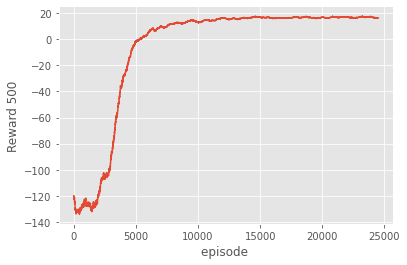

i'm ok-end


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pickle
from matplotlib import style
import time

style.use("ggplot")

SIZE = 38 #imagem: grid 10 por 10

HM_EPISODES = 25000 #nº de episodios
MOVE_PENALTY = 1
FOOD_REWARD = 25   #reward quando chega ao objetivo
epsilon = 1
EPS_DECAY = 0.9998  # Every episode will be epsilon*EPS_DECAY
SHOW_EVERY = 500  # how often to play through env visually.

#se tiver uma q_table, posso carrega-la
start_q_table = None # None or Filename

LEARNING_RATE = 0.1
DISCOUNT = 0.95

#imagem:cores dos quadrados
PLAYER_N = 1  # player key in dict
FOOD_N = 2  # food key in dict
# the dict!
d = {1: (255, 175, 0),
     2: (0, 255, 0)}

#classe dos quadrados
class Blob:
#posição do quadrado
    def __init__(self):
    	self.x = 1
    	self.y = 1
    
	    	
    def posicao(self, natureza):
    	self.x = np.random.randint(0, SIZE)
    	self.y = 1
    	if natureza == 0:
	    	self.x = 12    	
#imprimir   
    def __str__(self):
        return f"{self.x}, {self.y}"
#é o outro quadrado
    def __sub__(self, other):
        return (self.x-other.x, self.y-other.y)
#as ações e a interação na imagem 
    def action(self, choice):
        '''
        Gives us 2 total movement options. (0,1)
        '''
        #action 0 = off motor
        if choice == 0:
            self.move(x=1)
        #action 1 = on motor  
        #-1 para dexer até 0  
        elif choice == 1:
            self.move(x=-1)

    def move(self, x=False):

    
        # If no value for y, move randomly
        if not x:
            self.x += np.random.randint(-1, 1)
        else:
            self.x += x

        #walls
        # If we are out of bounds, fix!
        if self.x < 0:
            self.x = 0
        elif self.x > SIZE-1:
            self.x = SIZE-1


if start_q_table is None:
    # initialize the q-table#
    # (x1,y1)(x2,y2)
    # diferença de posição do quadrado, ao enimigo e à comida
    q_table = {}
    for i in range(-SIZE+1, SIZE):  #x1

                        q_table[(i)] = [np.random.uniform(-5, 0) for i in range(2)]
	

else:
    with open(start_q_table, "rb") as f:
        q_table = pickle.load(f)


# can look up from Q-table with: print(q_table[((-9, -2), (3, 9))]) for example

episode_rewards = []
print(q_table)
for episode in range(HM_EPISODES):
    player = Blob()
    food = Blob()
    player.posicao(1)
    food.posicao(0)
    if episode % SHOW_EVERY == 0:
        print(f"on #{episode}, epsilon is {epsilon}")
        print(f"{SHOW_EVERY} ep mean: {np.mean(episode_rewards[-SHOW_EVERY:])}")
        show = True
    else:
        show = False

    episode_reward = 0
    for i in range(200):
        obs = (player.x-food.x) #observador
        #print(obs)
        if np.random.random() > epsilon:
            # GET THE ACTION
            action = np.argmax(q_table[obs])
        else:
            action = np.random.randint(0, 1)
        # Take the action!
        player.action(action)
	
	#to avoid the enemy
        #if player.x == enemy.x and player.y == enemy.y:
        #   reward = -ENEMY_PENALTY
        if player.x <= food.x and player.y == food.y:
            reward = FOOD_REWARD
        else:
            reward = -MOVE_PENALTY
        ## NOW WE KNOW THE REWARD, LET'S CALC YO
        # first we need to obs immediately after the move.
        #nós já tomamos a ação em cima
        new_obs = (player.x - food.x)
        max_future_q = np.max(q_table[new_obs])
        current_q = q_table[obs][action]

        if reward == FOOD_REWARD:
            new_q = FOOD_REWARD  #para ficar nesse estado de maxima recompensa 
        else:
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
        q_table[obs][action] = new_q  #update the qtable

	#print the envieroment
        episode_reward += reward
        if reward == FOOD_REWARD:
            break

    #print(episode_reward)
    episode_rewards.append(episode_reward)
    epsilon *= EPS_DECAY

moving_avg = np.convolve(episode_rewards, np.ones((SHOW_EVERY,))/SHOW_EVERY, mode='valid')
print("i'm ok-before the plots")
plt.plot([i for i in range(len(moving_avg))], moving_avg)
plt.ylabel(f"Reward {SHOW_EVERY}")
plt.xlabel("episode ")
plt.show()
print("i'm ok-end")

#with open(f"qtable-{int(time.time())}.pickle", "wb") as f:
 #   pickle.dump(q_table, f)
